In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_data(size= 10000):
    df = pd.DataFrame()
    size = 10000
    df['age'] = np.random.randint(0,100,size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.randint(size)
    df['favorite_food'] = np.random.choice(['pizza','ice-cream','burger','rice'], size)
    df['hate_food'] = np.random.choice(['milk','vegetables','eggs'])
    return df

In [3]:
df = get_data()
df.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,18,5,1949,burger,vegetables
1,15,0,1949,burger,vegetables
2,47,4,1949,ice-cream,vegetables
3,4,5,1949,rice,vegetables
4,93,2,1949,pizza,vegetables


In [4]:
df.shape

(10000, 5)

In [5]:
# The task we will work on is a reward calculation based on the following measures:

# If they were in bed for more than 5 hours and sleeping more than 50%, we will give them their favorite food.
# Otherwise, we give them their hate food
# If they are over 90 years old give them their favorite food regardless

In [6]:
def reward_cal(row):
    if row['age'] >=90:
        return row['favorite_food'] 
    elif (row['time_in_bed'] > 5) & (row['pct_sleeping']>0.5):
        return row['favorite_food']
    return row['hate_food']

# 1.Level For Loop

In [7]:
df.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,18,5,1949,burger,vegetables
1,15,0,1949,burger,vegetables
2,47,4,1949,ice-cream,vegetables
3,4,5,1949,rice,vegetables
4,93,2,1949,pizza,vegetables


In [8]:
%%timeit

for index, row in df.iterrows():
   df.loc[index,'reward'] = reward_cal(row)

1.86 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 2.Level Apply Method

In [9]:
df.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,18,5,1949,burger,vegetables,vegetables
1,15,0,1949,burger,vegetables,vegetables
2,47,4,1949,ice-cream,vegetables,vegetables
3,4,5,1949,rice,vegetables,vegetables
4,93,2,1949,pizza,vegetables,pizza


In [10]:
%%timeit
df['reward'] = df.apply(reward_cal, axis = 1)

113 ms ± 5.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 3.Level Best Way Vectorization

In [11]:
df.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food,reward
0,18,5,1949,burger,vegetables,vegetables
1,15,0,1949,burger,vegetables,vegetables
2,47,4,1949,ice-cream,vegetables,vegetables
3,4,5,1949,rice,vegetables,vegetables
4,93,2,1949,pizza,vegetables,pizza


In [12]:
%%timeit

df['reward'] = df['hate_food']
df.loc[((df['pct_sleeping']>0.5) &(df['time_in_bed']>5)) | (df['age']>90), 'reward'] = df['favorite_food']
# df.at[((df['pct_sleeping']>0.5) &(df['time_in_bed']>5)) | (df['age']>90), 'reward'] = df['favorite_food'] # df.at didin't work because it want the index number only. df.loc better.

1.33 ms ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Comparision

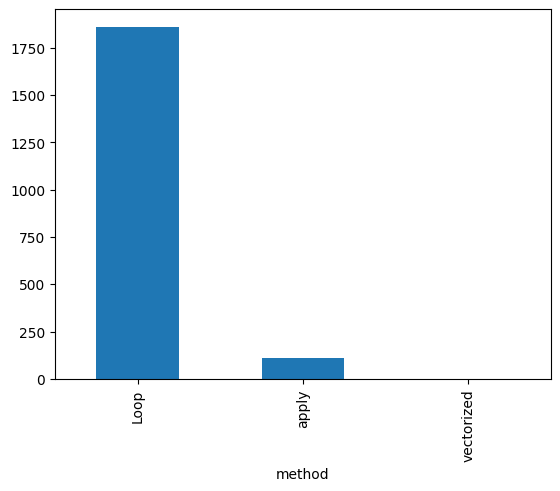

In [14]:
results = pd.DataFrame(
    [
        ["Loop", 1860],
        ["apply", 113],
        ['vectorized', 1.33]
        
    ],
    columns = ['method', 'run_time']

)

results.set_index('method')['run_time'].plot(kind='bar');

In [ ]:
# Do Vectorization if you can !